In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit

sys.path.append("..")

from theory.empirical import Expt, ExptGrid
from theory.exact import calc_exact_df
from theory.plotting import plot_results

sns.set_style("whitegrid")

In [3]:
expt = Expt(lambda_=150, p=2.01, q=2, r=0.99, tau=1)

In [4]:
grid = ExptGrid(
    p=expt.p,
    q=expt.q,
    r=expt.r,
    tau=expt.tau,
    ms=np.arange(2, 10),
    ns=np.array(10 ** np.linspace(2, 5, 10), dtype=int),
    extra_m=4,
    niters=10,
    alpha_options=10 ** np.linspace(-2, 2, 20),
)
kappa = np.log(expt.p) / np.log(expt.q)
exponent = (kappa + 1) / (2 * kappa + 1)

In [5]:
empirical = pd.read_csv(
    "/mnt/enigma0/km/results/scaling/theory/excess_err/2024-02-20_17-04-57/empirical.csv"
)

In [6]:
exact = calc_exact_df(
    expt,
    b_const=0,
    v_const=0,
    ns=np.array(10 ** np.linspace(2, 5, 46), dtype=int),
    ms=grid.ms,
    lambda_options=grid.alpha_options,
    scale_by_n=True,
)
exact["excess_err"] = exact["test_err_pred"] - expt.tau**2

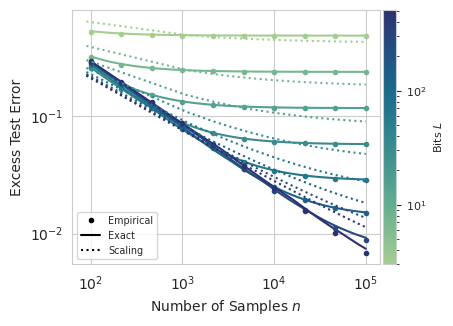

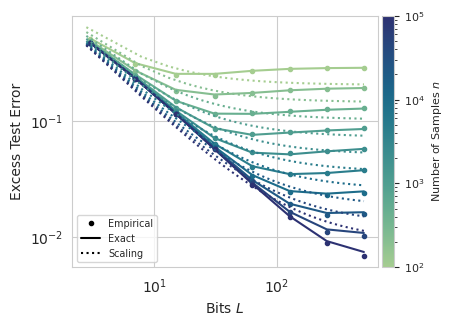

In [7]:
to_fit = lambda x, a, b, alpha, beta: a * x[0] ** -alpha + b * x[1] ** -beta
popt, pcov = curve_fit(
    to_fit,
    empirical[["n", "L"]].to_numpy().T,
    empirical["excess_err"].to_numpy(),
)
plot_results(
    exact,
    comparison=empirical,
    curve=to_fit,
    popt=popt,
    legend=False,
    color="crest",
    legend_kwargs={"loc": "lower left"},
    separate_plots=True,
)